In [ ]:
# José Santos Flores Silva	      1851125
# Fátima Daniela Lozoya Leal      
# Laura Mayte Mireles Garza       
# Johan Jefte Rodríguez Santos    1865007

# Entregable 2: Uso de modelos de ensamble, SVM y redes neuronales

Considera los conjuntos de datos titanic_train y titanit_val. 

Usa los modelos random forest, gradient boosting, xgboos, svm y redes neuronales de  para predecir la supervivencia de los pasajeros del titanic. Valida el rendimiento de tu modelo con los datos de titanic_val.

Debes probar distintos hiperparámetros en cada uno de los modelos.

# Lectura de Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score

In [2]:
#Los archivos de Excel "titanic_train.xlsx" y "titanic_train.xlsx" debe ser 
#subidos a la máquina virtual de Colab.
dataTrain = pd.read_excel("/content/titanic_train.xlsx")
dataVal = pd.read_excel("/content/titanic_val.xlsx")

In [3]:
#Datos de Entrenamiento

In [3]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  713 non-null    int64  
 1   Survived     713 non-null    int64  
 2   Pclass       713 non-null    int64  
 3   Name         713 non-null    object 
 4   Sex          713 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        713 non-null    int64  
 7   Parch        713 non-null    int64  
 8   Ticket       713 non-null    object 
 9   Fare         713 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.0+ KB


In [4]:
#Usamos la función shuffle para romper cualquier tipo de patrón de ordenamiento
dataTrain = shuffle(dataTrain)
dataTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
294,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S
403,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
182,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
185,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
124,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S


In [5]:
#Verificamos en qué campos tenemos valores nulos así como la cantidad de valores nulos
dataTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            141
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          554
Embarked         2
dtype: int64

In [6]:
#Eliminamos los registros con datos nulos y generamos las covariables X y Y
dataTrain = dataTrain.dropna()
x_Train = dataTrain.drop(labels = ['PassengerId', 'Survived', 'Name', 
                                   'SibSp', 'Parch', 'Ticket', 'Fare', 
                                   'Cabin'], axis = 1)
y_Train = dataTrain['Survived']

In [7]:
x_Train

,Pclass,Sex,Age,Embarked
626,1,female,48.0,S
555,1,male,58.0,C
526,1,male,47.0,S
458,1,male,48.0,S
188,1,male,36.0,S
...,...,...,...,...
510,1,female,52.0,S
31,1,female,40.0,S
402,1,female,24.0,S
201,1,female,58.0,S


In [8]:
y_Train

626    1
555    0
526    0
458    1
188    0
      ..
510    1
31     1
402    1
201    1
94     0
Name: Survived, Length: 141, dtype: int64

In [ ]:
#Datos de Prueba

In [9]:
dataVal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  178 non-null    int64  
 1   Survived     178 non-null    int64  
 2   Pclass       178 non-null    int64  
 3   Name         178 non-null    object 
 4   Sex          178 non-null    object 
 5   Age          142 non-null    float64
 6   SibSp        178 non-null    int64  
 7   Parch        178 non-null    int64  
 8   Ticket       178 non-null    object 
 9   Fare         178 non-null    float64
 10  Cabin        45 non-null     object 
 11  Embarked     178 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.8+ KB


In [10]:
#Usamos la función shuffle para romper cualquier tipo de patrón de ordenamiento
dataVal = shuffle(dataVal)
dataVal.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
114,590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.050,NaN,S
16,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175,E31,S
5,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.750,NaN,Q
58,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.250,NaN,S
22,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.775,NaN,S


In [11]:
#Verificamos en qué campos tenemos valores nulos así como la cantidad de valores nulos
dataVal.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             36
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          133
Embarked         0
dtype: int64

In [12]:
#Eliminamos los registros con datos nulos y generamos las covariables X y Y
dataVal = dataVal.dropna()
x_Val = dataVal.drop(labels = ['PassengerId', 'Survived', 'Name', 
                                   'SibSp', 'Parch', 'Ticket', 'Fare', 
                                   'Cabin'], axis = 1)
y_Val = dataVal['Survived']

In [13]:
x_Val

,Pclass,Sex,Age,Embarked
16,1,male,46.0,S
177,1,male,26.0,C
109,1,female,53.0,S
142,1,male,27.0,S
11,2,female,29.0,S
39,1,male,44.0,Q
19,1,male,23.0,C
34,2,male,3.0,S
175,1,female,19.0,S
26,1,female,19.0,S


In [14]:
y_Val

16     0
177    1
109    1
142    1
11     1
39     0
19     1
34     1
175    1
26     1
106    0
136    1
123    1
91     0
41     0
77     1
100    0
104    0
46     1
115    1
1      1
31     0
44     0
167    1
56     1
134    0
131    0
96     1
132    0
125    1
3      0
63     1
32     1
110    1
65     0
147    0
94     1
101    0
67     0
140    0
9      1
0      1
Name: Survived, dtype: int64

In [15]:
#Utilizando la librería LabelEncoder, convertimos en valores binario el campo 'Sex'
label = LabelEncoder()
x_Train['Sex'] = label.fit_transform(x_Train['Sex'])
x_Val['Sex'] = label.fit_transform(x_Val['Sex'])
gender = {x:y for x, y in enumerate(label.classes_)}
gender

{0: 'female', 1: 'male'}

In [16]:
#Utilizamos variables dummies para evitar colinealidad
x_Train = pd.get_dummies(x_Train, drop_first = True, columns = ['Embarked'])
x_Val = pd.get_dummies(x_Val, drop_first = True, columns = ['Embarked'])
columns = x_Train.columns

In [17]:
x_Train

,Pclass,Sex,Age,Embarked_Q,Embarked_S
626,1,0,48.0,0,1
555,1,1,58.0,0,0
526,1,1,47.0,0,1
458,1,1,48.0,0,1
188,1,1,36.0,0,1
...,...,...,...,...,...
510,1,0,52.0,0,1
31,1,0,40.0,0,1
402,1,0,24.0,0,1
201,1,0,58.0,0,1


In [18]:
x_Val

,Pclass,Sex,Age,Embarked_Q,Embarked_S
16,1,1,46.0,0,1
177,1,1,26.0,0,0
109,1,0,53.0,0,1
142,1,1,27.0,0,1
11,2,0,29.0,0,1
39,1,1,44.0,1,0
19,1,1,23.0,0,0
34,2,1,3.0,0,1
175,1,0,19.0,0,1
26,1,0,19.0,0,1


In [19]:
#Hacemos un escalamiento de datos y convertimos estas variables en matrices numéricas
scaler = StandardScaler()
x_Train = scaler.fit_transform(x_Train)
x_Val = scaler.fit_transform(x_Val)

In [20]:
x_Train

array([[-3.69689621e-01, -1.00711753e+00,  7.68107781e-01,
        -8.45154255e-02,  7.52772653e-01],
       [-3.69689621e-01,  9.92932774e-01,  1.40478094e+00,
        -8.45154255e-02, -1.32842233e+00],
       [-3.69689621e-01,  9.92932774e-01,  7.04440465e-01,
        -8.45154255e-02,  7.52772653e-01],
       [-3.69689621e-01,  9.92932774e-01,  7.68107781e-01,
        -8.45154255e-02,  7.52772653e-01],
       [-3.69689621e-01,  9.92932774e-01,  4.09999450e-03,
        -8.45154255e-02,  7.52772653e-01],
       [-3.69689621e-01,  9.92932774e-01,  6.08939492e-01,
        -8.45154255e-02,  7.52772653e-01],
       [-3.69689621e-01,  9.92932774e-01,  1.31434626e-01,
        -8.45154255e-02,  7.52772653e-01],
       [-3.69689621e-01,  9.92932774e-01,  6.77673100e-02,
        -8.45154255e-02,  7.52772653e-01],
       [-3.69689621e-01,  9.92932774e-01,  9.59109727e-01,
        -8.45154255e-02,  7.52772653e-01],
       [-3.69689621e-01, -1.00711753e+00, -8.23575107e-01,
        -8.45154255e-02

In [21]:
x_Val

array([[-0.38138504,  0.8660254 ,  0.73658707, -0.15617376,  0.78446454],
       [-0.38138504,  0.8660254 , -0.57846742, -0.15617376, -1.27475488],
       [-0.38138504, -1.15470054,  1.19685614, -0.15617376,  0.78446454],
       [-0.38138504,  0.8660254 , -0.5127147 , -0.15617376,  0.78446454],
       [ 1.6208864 , -1.15470054, -0.38120925, -0.15617376,  0.78446454],
       [-0.38138504,  0.8660254 ,  0.60508162,  6.40312424, -1.27475488],
       [-0.38138504,  0.8660254 , -0.7757256 , -0.15617376, -1.27475488],
       [ 1.6208864 ,  0.8660254 , -2.09078009, -0.15617376,  0.78446454],
       [-0.38138504, -1.15470054, -1.0387365 , -0.15617376,  0.78446454],
       [-0.38138504, -1.15470054, -1.0387365 , -0.15617376,  0.78446454],
       [-0.38138504,  0.8660254 ,  0.99959797, -0.15617376, -1.27475488],
       [-0.38138504,  0.8660254 ,  0.07905982, -0.15617376, -1.27475488],
       [-0.38138504,  0.8660254 , -0.18395107, -0.15617376, -1.27475488],
       [-0.38138504,  0.8660254 ,  1.9

In [22]:
#Obtenemos la media y la varianza de los datos
x_Train.mean(axis = 0).round(2), x_Train.var(axis = 0)

(array([ 0.,  0.,  0.,  0., -0.]), array([1., 1., 1., 1., 1.]))

In [23]:
#Obtenemos la media y la varianza de los datos
x_Val.mean(axis = 0).round(2), x_Val.var(axis = 0)

(array([-0.,  0., -0., -0., -0.]), array([1., 1., 1., 1., 1.]))

In [24]:
#77.05% para entrenamiento y 22.95% para prueba
x_Train.shape, x_Val.shape, y_Train.shape, y_Val.shape

((141, 5), (42, 5), (141,), (42,))

# Random Forest

In [26]:
# Paralelizar la implementacion
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier(max_depth = 5, n_estimators = 1000, 
                                  min_samples_split = 3, min_samples_leaf = 2,
                                  max_features = "sqrt")
model_rf.fit(x_Train,y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
#Predicción de probabilidades
y_pred_raw = model_rf.predict_proba(x_Val)

In [28]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_Val,y_pred))
  precision_list.append(precision_score(y_Val,y_pred))
  recall_list.append(recall_score(y_Val,y_pred))
  f1_list.append(f1_score(y_Val,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['F1'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
502,0.502,0.761905,0.875,0.750000,0.807692
578,0.578,0.785714,0.750,0.857143,0.800000
577,0.577,0.785714,0.750,0.857143,0.800000
576,0.576,0.785714,0.750,0.857143,0.800000
575,0.575,0.785714,0.750,0.857143,0.800000
574,0.574,0.785714,0.750,0.857143,0.800000
573,0.573,0.785714,0.750,0.857143,0.800000
572,0.572,0.785714,0.750,0.857143,0.800000
500,0.500,0.738095,0.875,0.724138,0.792453
501,0.501,0.738095,0.875,0.724138,0.792453


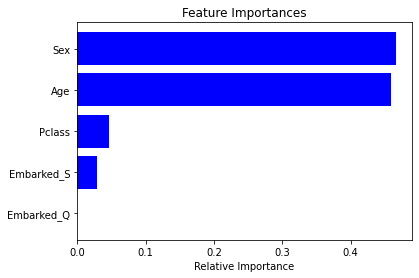

In [30]:
features = columns
importances = model_rf.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

In [31]:
np.round(importances, 3)

array([0.047, 0.466, 0.458, 0.   , 0.028])

In [32]:
df_importance.round(3)

,Feature,Importance
3,Embarked_Q,0.000
4,Embarked_S,0.028
0,Pclass,0.047
2,Age,0.458
1,Sex,0.466


# Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.75,
                                      max_depth = 1, random_state = 0,
                                      min_samples_split = 5, min_samples_leaf = 5)
model_gb.fit(x_Train,y_Train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [34]:
#Predicción de probabilidades
y_pred_raw = model_gb.predict_proba(x_Val)

In [35]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_Val,y_pred))
  precision_list.append(precision_score(y_Val,y_pred))
  recall_list.append(recall_score(y_Val,y_pred))
  f1_list.append(f1_score(y_Val,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['Accuracy'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
891,0.891,0.809524,0.708333,0.944444,0.809524
878,0.878,0.809524,0.708333,0.944444,0.809524
873,0.873,0.809524,0.708333,0.944444,0.809524
874,0.874,0.809524,0.708333,0.944444,0.809524
875,0.875,0.809524,0.708333,0.944444,0.809524
876,0.876,0.809524,0.708333,0.944444,0.809524
904,0.904,0.809524,0.708333,0.944444,0.809524
903,0.903,0.809524,0.708333,0.944444,0.809524
902,0.902,0.809524,0.708333,0.944444,0.809524
901,0.901,0.809524,0.708333,0.944444,0.809524


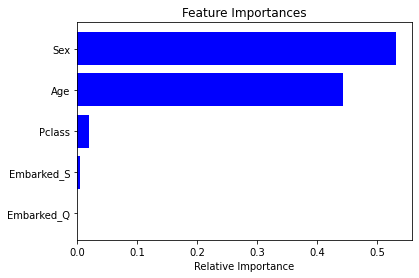

In [37]:
features = columns
importances = model_gb.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

In [38]:
np.round(importances, 3)

array([0.02 , 0.532, 0.443, 0.   , 0.005])

In [39]:
df_importance.round(3)

,Feature,Importance
3,Embarked_Q,0.000
4,Embarked_S,0.005
0,Pclass,0.020
2,Age,0.443
1,Sex,0.532


# XGBOOST

In [40]:
import xgboost as xbg

In [47]:
model_xgb = xbg.XGBClassifier(
    n_estimators = 300, 
    learning_rate = 0.75,
    max_depth = 1, 
    random_state = 0,
    min_samples_split = 5, 
    min_samples_leaf = 5,
    reg_lambda=1,
    gamma=0,
)
model_xgb.fit(x_Train,y_Train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.75, max_delta_step=0, max_depth=1,
              min_child_weight=1, min_samples_leaf=5, min_samples_split=5,
              missing=None, n_estimators=300, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [48]:
#prediccion de probabilidades
y_pred_raw = model_xgb.predict_proba(x_Val)

In [49]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_Val,y_pred))
  precision_list.append(precision_score(y_Val,y_pred))
  recall_list.append(recall_score(y_Val,y_pred))
  f1_list.append(f1_score(y_Val,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['Accuracy'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
837,0.837,0.785714,0.666667,0.941176,0.780488
853,0.853,0.785714,0.666667,0.941176,0.780488
840,0.840,0.785714,0.666667,0.941176,0.780488
841,0.841,0.785714,0.666667,0.941176,0.780488
842,0.842,0.785714,0.666667,0.941176,0.780488
843,0.843,0.785714,0.666667,0.941176,0.780488
844,0.844,0.785714,0.666667,0.941176,0.780488
845,0.845,0.785714,0.666667,0.941176,0.780488
846,0.846,0.785714,0.666667,0.941176,0.780488
847,0.847,0.785714,0.666667,0.941176,0.780488


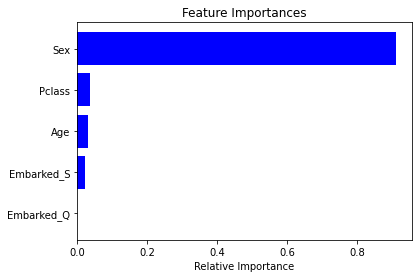

In [51]:
features = columns
importances = model_xgb.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

# SVM

In [25]:
from sklearn.svm import SVC
model_svm = SVC(gamma='auto', kernel='rbf',probability=True)
model_svm.fit(x_Train,y_Train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [27]:
#prediccion de probabilidades
y_pred_raw = model_svm.predict_proba(x_Val)

In [28]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_Val,y_pred))
  precision_list.append(precision_score(y_Val,y_pred))
  recall_list.append(recall_score(y_Val,y_pred))
  f1_list.append(f1_score(y_Val,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['Accuracy'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
854,0.854,0.785714,0.666667,0.941176,0.780488
850,0.850,0.785714,0.666667,0.941176,0.780488
852,0.852,0.785714,0.666667,0.941176,0.780488
853,0.853,0.785714,0.666667,0.941176,0.780488
849,0.849,0.785714,0.666667,0.941176,0.780488
855,0.855,0.785714,0.666667,0.941176,0.780488
856,0.856,0.785714,0.666667,0.941176,0.780488
857,0.857,0.785714,0.666667,0.941176,0.780488
858,0.858,0.785714,0.666667,0.941176,0.780488
859,0.859,0.785714,0.666667,0.941176,0.780488


# Redes Neuronales

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu',
 input_dim = x_Train.shape[1]))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 11,137
Trainable params: 11,137
Non-trainable params: 0
_________________________________________________________________


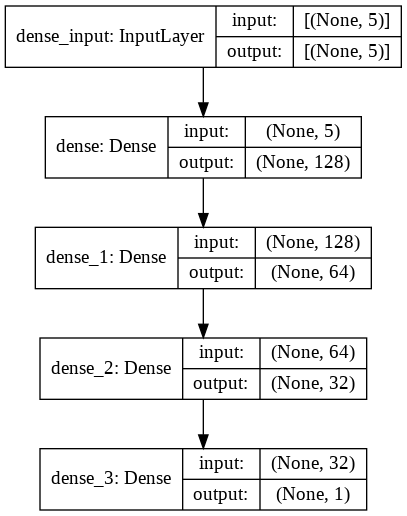

In [33]:
tf.keras.utils.plot_model(
    model, show_shapes=True, 
    show_layer_names=True)

In [34]:
import numpy as np
v= np.array([5,128,64,32,1])

In [35]:
(v[:-1]+1) , (v[1:]),(v[:-1]+1) * (v[1:]) ,  sum((v[:-1]+1) * (v[1:]))

(array([  6, 129,  65,  33]),
 array([128,  64,  32,   1]),
 array([ 768, 8256, 2080,   33]),
 11137)

In [36]:
model.compile(loss = 'binary_crossentropy',
 optimizer='adam', metrics=['accuracy'])

In [37]:
x_Train.shape[0],x_Train.shape[0]*0.8, x_Train.shape[0]*0.8 / 32 

(141, 112.80000000000001, 3.5250000000000004)

In [39]:
r = model.fit(x_Train,y_Train, batch_size = 50, epochs = 200,
 validation_split = 0.25)

Epoch 1/200
3/3 [==============================] - 3s 111ms/step - loss: 0.6526 - accuracy: 0.6476 - val_loss: 0.5593 - val_accuracy: 0.8611
Epoch 2/200
3/3 [==============================] - 0s 14ms/step - loss: 0.6139 - accuracy: 0.6476 - val_loss: 0.5386 - val_accuracy: 0.8611
Epoch 3/200
3/3 [==============================] - 0s 14ms/step - loss: 0.5860 - accuracy: 0.6476 - val_loss: 0.5149 - val_accuracy: 0.8611
Epoch 4/200
3/3 [==============================] - 0s 14ms/step - loss: 0.5601 - accuracy: 0.6857 - val_loss: 0.4975 - val_accuracy: 0.8056
Epoch 5/200
3/3 [==============================] - 0s 14ms/step - loss: 0.5342 - accuracy: 0.7524 - val_loss: 0.4860 - val_accuracy: 0.8056
Epoch 6/200
3/3 [==============================] - 0s 24ms/step - loss: 0.5129 - accuracy: 0.7619 - val_loss: 0.4731 - val_accuracy: 0.8056
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 0.4930 - accuracy: 0.7619 - val_loss: 0.4557 - val_accuracy: 0.7778
Epoch 8/200
3/3 [==

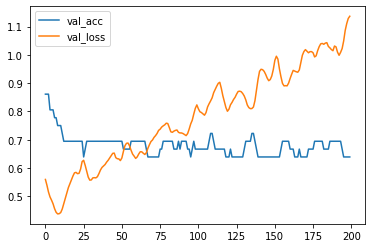

In [40]:
import matplotlib.pyplot as plt
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [41]:
y_pred_raw = model.predict(x_Val)
y_pred_raw

array([[0.14027724],
       [0.39712358],
       [0.9999474 ],
       [0.38222834],
       [0.9998398 ],
       [0.9964334 ],
       [0.4374189 ],
       [0.98378193],
       [1.        ],
       [1.        ],
       [0.6530999 ],
       [0.42948297],
       [0.32338122],
       [0.22805542],
       [0.99643207],
       [0.9999925 ],
       [0.09415681],
       [0.13139898],
       [0.999119  ],
       [0.67539907],
       [0.9999994 ],
       [0.7383473 ],
       [0.23343544],
       [1.        ],
       [0.9999976 ],
       [0.40568385],
       [0.4536504 ],
       [0.4128377 ],
       [0.13139898],
       [0.99999094],
       [0.36717469],
       [0.9999981 ],
       [1.        ],
       [0.99999857],
       [0.39753908],
       [0.40318415],
       [0.43376926],
       [0.9999999 ],
       [0.15017956],
       [0.04696322],
       [0.9806867 ],
       [0.9995073 ]], dtype=float32)

In [42]:
y_pred_raw = [[1-x[0],x[0]] for x in y_pred_raw]
y_pred_raw

[[0.859722763299942, 0.14027724],
 [0.6028764247894287, 0.39712358],
 [5.257129669189453e-05, 0.9999474],
 [0.6177716553211212, 0.38222834],
 [0.00016021728515625, 0.9998398],
 [0.0035666227340698242, 0.9964334],
 [0.5625810921192169, 0.4374189],
 [0.016218066215515137, 0.98378193],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.3469001054763794, 0.6530999],
 [0.5705170333385468, 0.42948297],
 [0.6766187846660614, 0.32338122],
 [0.7719445824623108, 0.22805542],
 [0.003567934036254883, 0.99643207],
 [7.510185241699219e-06, 0.9999925],
 [0.9058431908488274, 0.09415681],
 [0.8686010241508484, 0.13139898],
 [0.0008810162544250488, 0.999119],
 [0.3246009349822998, 0.67539907],
 [5.960464477539062e-07, 0.9999994],
 [0.26165270805358887, 0.7383473],
 [0.7665645629167557, 0.23343544],
 [0.0, 1.0],
 [2.384185791015625e-06, 0.9999976],
 [0.594316154718399, 0.40568385],
 [0.5463496148586273, 0.4536504],
 [0.5871622860431671, 0.4128377],
 [0.8686010241508484, 0.13139898],
 [9.059906005859375e-06, 0.99999094],
 [0.

In [44]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_Val,y_pred))
  precision_list.append(precision_score(y_Val,y_pred))
  recall_list.append(recall_score(y_Val,y_pred))
  f1_list.append(f1_score(y_Val,y_pred))

In [45]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['F1'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
271,0.271,0.761905,1.0,0.705882,0.827586
288,0.288,0.761905,1.0,0.705882,0.827586
296,0.296,0.761905,1.0,0.705882,0.827586
295,0.295,0.761905,1.0,0.705882,0.827586
294,0.294,0.761905,1.0,0.705882,0.827586
293,0.293,0.761905,1.0,0.705882,0.827586
292,0.292,0.761905,1.0,0.705882,0.827586
291,0.291,0.761905,1.0,0.705882,0.827586
290,0.290,0.761905,1.0,0.705882,0.827586
289,0.289,0.761905,1.0,0.705882,0.827586
